In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/u/gu/riverr/PaperDoubleFig.mplstyle')
from scipy.io import loadmat
import subprocess as sp
import matlab.engine

In [2]:
def run_mat(P1, P2):
    with open('baseline_sim.m', 'r') as f:
        lines = f.readlines()
    
    newlines = []
    for line in lines:
        if line.startswith('P1'):
            newlines.append(f'P1 = {P1};\n')
        elif line.startswith('P2'):
            newlines.append(f'P2 = {P2};\n')
        else:
            newlines.append(line)
    
    with open('new_sim.m', 'w') as f:
        f.writelines(newlines)
        
    eng = matlab.engine.start_matlab()
    eng.new_sim(nargout=0)
    eng.quit()
    

In [37]:
def process_output(bc, nbins):
    dat = loadmat(f'{bc}.mat', simplify_cells=True)[bc]
    wit_idx = (dat['Q']==np.min(np.unique(dat['Q'])))&(dat['stop']==0)
    drive_idx = (dat['Q']==np.max(np.unique(dat['Q'])))&(dat['stop']==0)
    bunch_sep = np.abs(np.mean(dat['x'][4,drive_idx]) - np.mean(dat['x'][4,wit_idx]))
    print(np.mean(dat['x'][4,drive_idx]))
    zs = np.linspace(dat['x'][4,drive_idx].min(), dat['x'][4,drive_idx].max(), nbins)
    curs = []
    dz = np.mean(np.diff(zs))
    for i, z in enumerate(zs):
        new_idx = (dat['x'][4,drive_idx]>zs.min()+i*dz)&(dat['x'][4,drive_idx]<=zs.min()+(i+1)*dz)
        curs.append(np.sum(dat['Q'][drive_idx][new_idx])/(dz/3e8))
    return bunch_sep, np.max(curs)


In [61]:
P1s = np.linspace(-9, -3, 10)
seps = np.zeros_like(P1s)
curs = np.zeros_like(P1s)
for i, P1 in enumerate(P1s):
    print(P1)
    run_mat(P1, 0)
    res = (process_output('bc20', 2000))
    seps[i] = res[0]
    curs[i] = res[1]

-9.0
-8.44615631714794e-06
-8.333333333333334
-3.653047084036112e-06
-7.666666666666667
-2.3212793170418493e-06
-7.0
-2.8321395276022293e-06
-6.333333333333334
-5.381848049322826e-06
-5.666666666666667
-7.255610765545658e-06
-5.0
-1.4170868770588765e-05
-4.333333333333334
-2.6255160926381984e-05
-3.666666666666667
-3.938252541139331e-05
-3.0
-5.238989279308094e-05


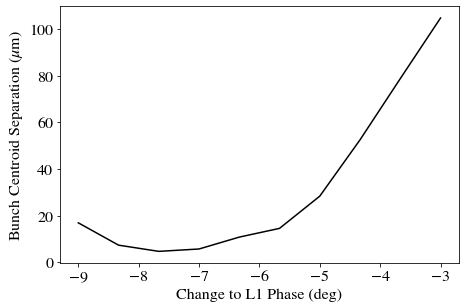

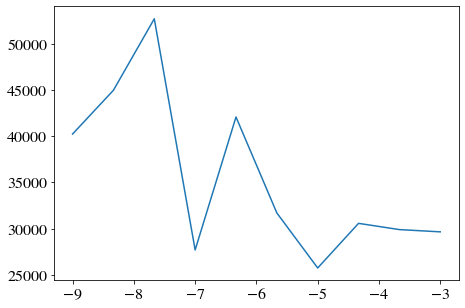

In [62]:
P1s
plt.plot(P1s, 1e6*np.array(seps), 'k')
plt.xlabel('Change to L1 Phase (deg)')
plt.ylabel('Bunch Centroid Separation ($\mu$m)')
plt.show()
plt.plot(P1s, curs)

#np.savetxt('p1_scan.txt', np.array([P1s, seps]).T)

In [23]:
P2s = np.linspace(-5, 0, 10)
seps_p2 = np.zeros_like(P2s)
curs_p2 = np.zeros_like(P2s)
for i, P2 in enumerate(P2s):
    print(P2)
    run_mat(-7.5, P2)
    res = (process_output('bc20', 200))
    seps_p2[i] = res[0]
    curs_p2[i] = res[1]

-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0


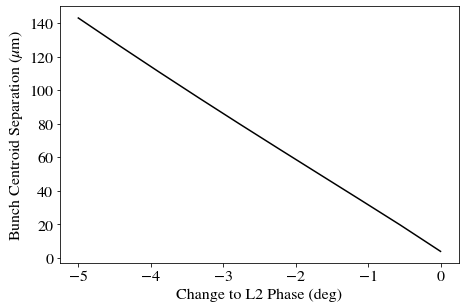

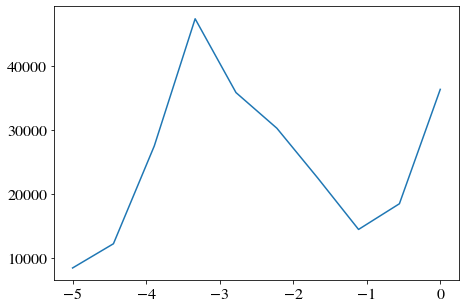

In [25]:
plt.plot(P2s, 1e6*np.array(seps_p2), 'k')
plt.xlabel('Change to L2 Phase (deg)')
plt.ylabel('Bunch Centroid Separation ($\mu$m)')
plt.show()
plt.plot(P2s, curs_p2)
np.savetxt('p2_scan_p1_-7.5.txt', np.array([P2s, seps_p2]).T)

In [17]:
%%time 

P1s = np.linspace(-9, -3, 12)
P2s = np.linspace(-5, 0, 10)
seps = np.zeros_like(P2s)
curs = np.zeros_like(P2s)
for P1 in P1s:
    print(f'P1 is now {P1}')
    for i, P2 in enumerate(P2s):
        print(P2)
        try:
            run_mat(P1, P2)
            res = process_output('bc20', 1000)
            seps[i] = res[0]
            curs[i] = res[1]
        except matlab.engine.MatlabExecutionError as e:
            seps[i] = 0
            curs[i] = 0
    np.savetxt(f'p1_{P1}.txt', np.array([P2s, seps, curs]).T)

P1 is now -9.0
-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0
P1 is now -8.454545454545455
-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0
P1 is now -7.909090909090909
-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0
P1 is now -7.363636363636363
-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0
P1 is now -6.818181818181818
-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0
P1 is now -6.272727272727273
-5.0
-4.44

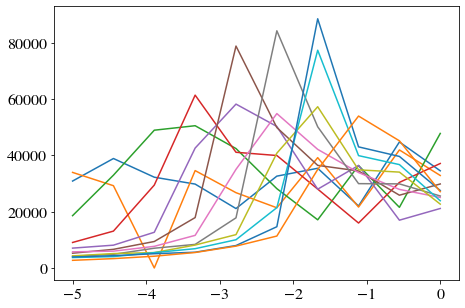

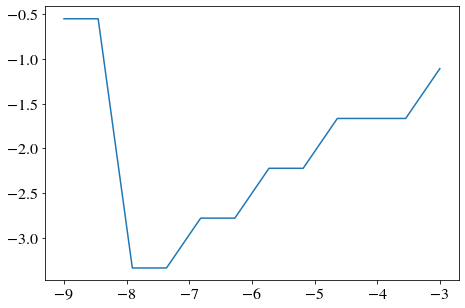

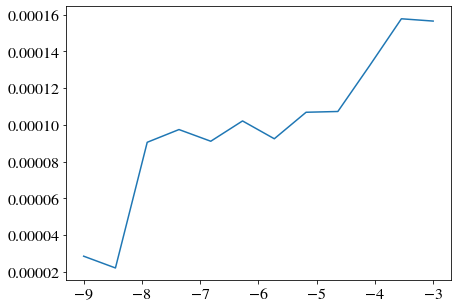

In [26]:
peakP2 = []
sep_fullcomp = []
for P1 in P1s:
    dat = np.loadtxt(f'p1_{P1}.txt')
    peakP2.append(dat[:,0][np.argmax(dat[:,2])])
    sep_fullcomp.append(dat[:,1][np.argmax(dat[:,2])])
    plt.plot(dat[:,0], dat[:,2])
plt.show()
plt.plot(P1s, peakP2)
plt.show()
plt.plot(P1s, sep_fullcomp)

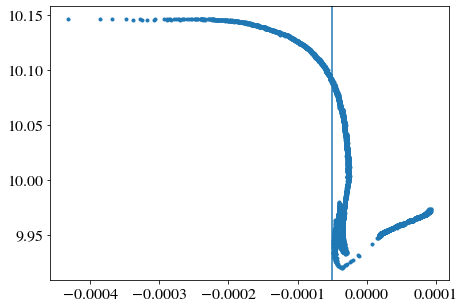

In [41]:
run_mat(-8.5, -4.4)
dat = loadmat('bc20.mat', simplify_cells=True)['bc20']
idx = dat['stop']==0
plt.plot(dat['x'][4,idx], dat['x'][5,idx], '.')
plt.axvline(x=-50e-6)

In [44]:
process_output('bc20', 1000)

-5.455001437862958e-05


(0.00010911095405555268, 29089.953704558087)

[0.45061728 0.18013468]


Text(0, 0.5, 'Change to L2 Phase (deg)')

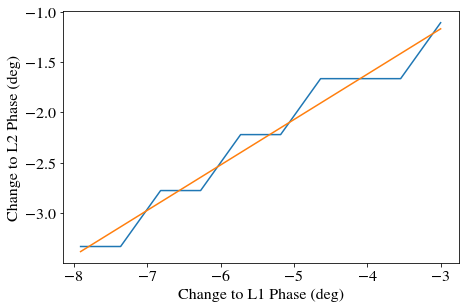

In [51]:
plt.plot(P1s[2:], peakP2[2:])
fit = np.polyfit(P1s[2:], peakP2[2:], 1)
print(fit)
plt.plot(P1s[2:], fit[1] + fit[0]*P1s[2:])
plt.xlabel('Change to L1 Phase (deg)')
plt.ylabel('Change to L2 Phase (deg)')

In [59]:
P1s = np.linspace(-10, -3, 10)
seps = np.zeros_like(P1s)
curs = np.zeros_like(P1s)
for i, P1 in enumerate(P1s):
    print(P1)
    run_mat(P1, fit[1] + fit[0]*P1)
    res = (process_output('bc20', 2000))
    seps[i] = res[0]
    curs[i] = res[1]

-10.0
-5.2461025583303554e-05
-9.222222222222221
-4.8130331646964484e-05
-8.444444444444445
-4.602788730141738e-05
-7.666666666666666
-4.5920219964573934e-05
-6.888888888888889
-4.708887517562763e-05
-6.111111111111111
-4.906586732799207e-05
-5.333333333333333
-5.086018479015142e-05
-4.555555555555555
-5.963088301801542e-05
-3.7777777777777777
-7.022945121459808e-05
-3.0
-7.969856371389874e-05


Text(0.5, 1.0, 'L1 Phase Scan with Optimized Local Change in L2 Phase')

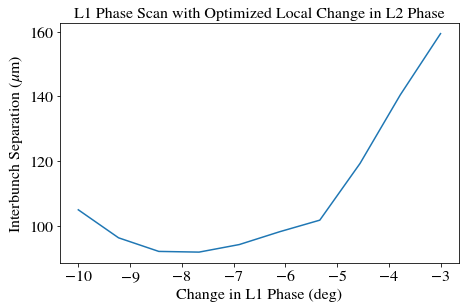

In [60]:
plt.plot(P1s, seps*1e6)
plt.xlabel('Change in L1 Phase (deg)')
plt.ylabel('Interbunch Separation ($\mu$m)')
plt.title('L1 Phase Scan with Optimized Local Change in L2 Phase')

In [55]:
%%time 

P1s = np.linspace(-10, -6, 5)

for P1 in P1s:
    print(f'P1 is now {P1}')
    P2s = fit[1] + fit[0]*P1 + np.linspace(-0.4, 0.4, 8)
    seps = np.zeros_like(P2s)
    curs = np.zeros_like(P2s)
    for i, P2 in enumerate(P2s):
        print(P2)
        try:
            run_mat(P1, P2)
            res = process_output('bc20', 1000)
            seps[i] = res[0]
            curs[i] = res[1]
        except matlab.engine.MatlabExecutionError as e:
            seps[i] = 0
            curs[i] = 0
    np.savetxt(f'opt_p1_{P1}.txt', np.array([P2s, seps, curs]).T)

P1 is now -10.0
-4.72603815937149
-5.538231181082373e-05
-4.611752445085775
-5.454684049873953e-05
-4.4974667308000615
-5.371233794932509e-05
-4.383181016514347
-5.287797722482136e-05
-4.268895302228633
-5.204412881159675e-05
-4.154609587942918
-5.121081696693845e-05
-4.040323873657204
-5.037802773091454e-05
-3.92603815937149
-4.9545868198838e-05
P1 is now -9.0
-4.275420875420872
-5.159187238204747e-05
-4.161135161135158
-5.0442247046318186e-05
-4.046849446849444
-4.9295822967397213e-05
-3.9325637325637297
-4.815230888733529e-05
-3.818278018278015
-4.701175078959798e-05
-3.703992303992301
-4.587378987449246e-05
-3.5897065897065867
-4.47377573641432e-05
-3.4754208754208724
-4.3603807335576256e-05
P1 is now -8.0
-3.824803591470255
-5.103853030465237e-05
-3.710517877184541
-4.95842549031068e-05
-3.5962321628988265
-4.8135000718281506e-05
-3.4819464486131126
-4.669060614655177e-05
-3.367660734327398
-4.5250898397130176e-05
-3.253375020041684
-4.381569770504545e-05
-3.1390893057559697
-4.23

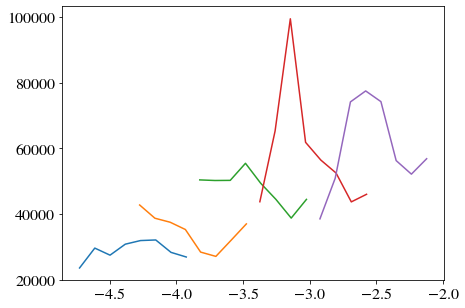

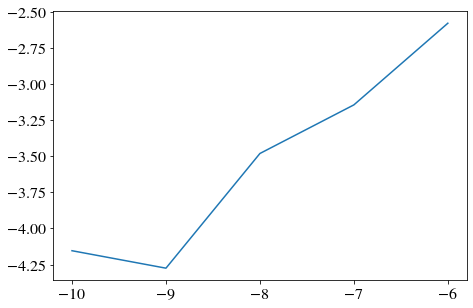

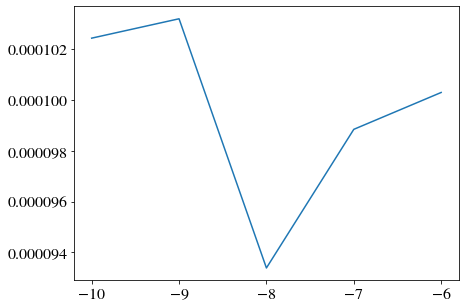

In [56]:
peakP2 = []
sep_fullcomp = []
for P1 in P1s:
    dat = np.loadtxt(f'opt_p1_{P1}.txt')
    peakP2.append(dat[:,0][np.argmax(dat[:,2])])
    sep_fullcomp.append(dat[:,1][np.argmax(dat[:,2])])
    plt.plot(dat[:,0], dat[:,2])
plt.show()
plt.plot(P1s, peakP2)
plt.show()
plt.plot(P1s, sep_fullcomp)

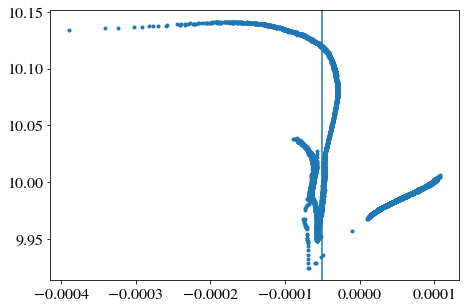

In [58]:
run_mat(-11, fit[1]+fit[0]*(-11))
dat = loadmat('bc20.mat', simplify_cells=True)['bc20']
idx = dat['stop']==0
plt.plot(dat['x'][4,idx], dat['x'][5,idx], '.')
plt.axvline(x=-50e-6)

In [63]:
def run_mat(P1, P2, P3):
    with open('baseline_sim.m', 'r') as f:
        lines = f.readlines()
    
    newlines = []
    for line in lines:
        if line.startswith('P1'):
            newlines.append(f'P1 = {P1};\n')
        elif line.startswith('P2'):
            newlines.append(f'P2 = {P2};\n')
        elif line.startswith('P3'):
            newlines.append(f'P3 = {P3};\n')
        else:
            newlines.append(line)
    
    with open('new_sim.m', 'w') as f:
        f.writelines(newlines)
        
    eng = matlab.engine.start_matlab()
    eng.new_sim(nargout=0)
    eng.quit()
    

-6.214347444678541e-06
(1.2429939501302685e-05, 20770.97247460426)


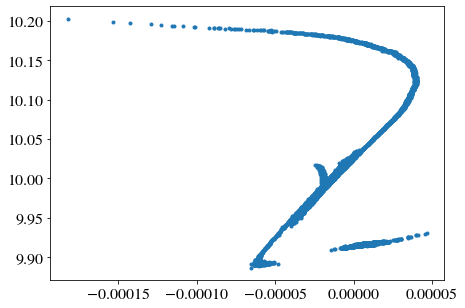

In [64]:
run_mat(-6, 0, 10)
dat = loadmat('bc20.mat', simplify_cells=True)['bc20']
idx = dat['stop']==0
plt.plot(dat['x'][4,idx], dat['x'][5,idx], '.')
print(process_output('bc20', 500))

-8.499533471037149e-05
(0.00017000769231974354, 34418.28057982763)


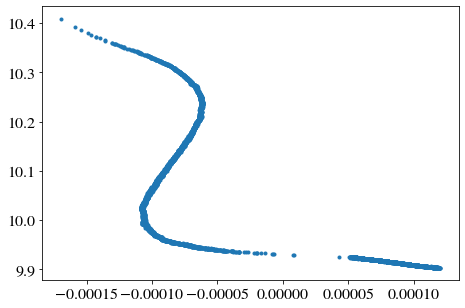

In [81]:
run_mat(0, 0, 45)
dat = loadmat('bc20.mat', simplify_cells=True)['bc20']
idx = dat['stop']==0
plt.plot(dat['x'][4,idx], dat['x'][5,idx], '.')
print(process_output('bc20', 500))